Import the library

In [24]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../../src/common")
from pharmacy_common import PharmacyCommon
common = PharmacyCommon()
from xgboost import XGBClassifier
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

Import the dataset

In [2]:
train_test_path = "../../data/train_test_data/XO_train_test_data.xlsx"
train_dataset = pd.read_excel(train_test_path, sheet_name='train_dataset')
test_dataset = pd.read_excel(train_test_path, sheet_name='test_dataset')
validation_dataset = pd.read_excel(train_test_path, sheet_name='validation_dataset')

In [3]:
print(len(train_dataset), len(test_dataset), len(validation_dataset))

337 73 73


Fingerprint Encoding

In [4]:
# ECFP4 - 1024bits
X_Train_ecfp4_1024 = common.gen_ecfp4_fpts(train_dataset['SMILES'],1024)
X_Test_ecpf4_1024 = common.gen_ecfp4_fpts(test_dataset['SMILES'],1024)
X_Val_ecfp4_1024 = common.gen_ecfp4_fpts(validation_dataset['SMILES'],1024)
# ECFP4 - 2048bits
X_Train_ecfp4_2048 = common.gen_ecfp4_fpts(train_dataset['SMILES'],2048)
X_Test_ecpf4_2048 = common.gen_ecfp4_fpts(test_dataset['SMILES'],2048)
X_Val_ecfp4_2048 = common.gen_ecfp4_fpts(validation_dataset['SMILES'],2048)
# ECFP6 - 1024bits 
X_Train_ecfp6_1024 = common.gen_ecfp6_fpts(train_dataset['SMILES'],1024)
X_Test_ecpf6_1024 = common.gen_ecfp6_fpts(test_dataset['SMILES'],1024)
X_Val_ecfp6_1024 = common.gen_ecfp6_fpts(validation_dataset['SMILES'],1024)
# ECFP6 - 2048bits
X_Train_ecfp6_2048 = common.gen_ecfp6_fpts(train_dataset['SMILES'],2048)
X_Test_ecpf6_2048 = common.gen_ecfp6_fpts(test_dataset['SMILES'],2048)
X_Val_ecfp6_2048 = common.gen_ecfp6_fpts(validation_dataset['SMILES'],2048)
# MACCS
X_Train_maccs = common.gen_maccs_fpts(train_dataset['SMILES'])
X_Test_maccs = common.gen_maccs_fpts(test_dataset['SMILES'])
X_Val_maccs = common.gen_maccs_fpts(validation_dataset['SMILES'])

Progress:   0%|          | 0/337 [00:00<?, ?it/s][10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:29] DEPRECATION WARNING: please use MorganGenerator
[10:06:

In [5]:
len(X_Test_ecpf4_1024[0]),len(X_Test_ecpf4_2048[0]), len(X_Test_ecpf6_1024[0]),len(X_Test_ecpf6_2048[0]),len(X_Test_maccs[0])

(1024, 2048, 1024, 2048, 167)

Label encoding

In [6]:
y_Train = np.array(train_dataset['Type'])
y_Test = np.array(test_dataset['Type'])
y_Val = np.array(validation_dataset['Type'])

#Original data
print("Original data:")
print(y_Train[0:5])
print(y_Test[0:5])
print(y_Val[0:5])

#One-hot encoder
label_encoder = preprocessing.LabelEncoder()
y_Train = label_encoder.fit_transform(y_Train)
y_Test = label_encoder.fit_transform(y_Test)
y_Val = label_encoder.fit_transform(y_Val)
print("Encoded data:")
print(y_Train[0:5])
print(y_Test[0:5])
print(y_Val[0:5])

Original data:
['inactive' 'active' 'inactive' 'active' 'active']
['active' 'active' 'inactive' 'inactive' 'active']
['inactive' 'active' 'inactive' 'inactive' 'inactive']
Encoded data:
[1 0 1 0 0]
[0 0 1 1 0]
[1 0 1 1 1]


Model Training

In [7]:
xgb_ecfp4_1024= XGBClassifier(objective='binary:logistic', tree_method="hist", n_estimators=170,max_depth=2, 
                           min_child_weight=5,reg_lambda=0.1, colsample_bytree=0.5,learning_rate=0.1,random_state= 42)
xgb_ecfp4_1024.fit(X_Train_ecfp4_1024, y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=170, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [8]:
xgb_ecfp4_2048 = XGBClassifier(objective='binary:logistic', tree_method="hist",colsample_bytree=.5,
                   learning_rate =0.1, max_depth=2, min_child_weight=7, n_estimators=120,reg_lambda =0.1,random_state= 42)
xgb_ecfp4_2048.fit(X_Train_ecfp4_2048, y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [9]:
xgb_ecfp6_1024 = XGBClassifier(objective='binary:logistic', tree_method="hist",colsample_bytree=0.5,
                   learning_rate =0.1, max_depth=2, min_child_weight=3, n_estimators=130,reg_lambda = 1,random_state= 42)
xgb_ecfp6_1024.fit(X_Train_ecfp6_1024, y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=130, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [10]:
xgb_ecfp6_2048 = XGBClassifier(objective='binary:logistic', tree_method="hist",colsample_bytree=None,
                   learning_rate =0.1, max_depth=9, min_child_weight=7, n_estimators=60,reg_lambda = 1,random_state= 42)
xgb_ecfp6_2048.fit(X_Train_ecfp6_2048, y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=60, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [11]:
xgb_maccs= XGBClassifier(objective='binary:logistic', tree_method="hist", colsample_bytree=0.5,learning_rate=0.01,
                    max_depth=5,min_child_weight=3, n_estimators=80, reg_lambda=0,random_state= 42)
xgb_maccs.fit(X_Train_maccs, y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Model Evaluation

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
from tabulate import tabulate
import math

def model_evaluation_calculation(cm):
    tp = cm[0][0]; tn = cm[1][1]; fp = cm[0][1]; fn = cm[1][0]
    ac = (tp+tn)/(tp+tn+fp+fn)
    mcc = (tp*tn - fp*fn) / math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    precision = tp / (tp +fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    return ac, precision, recall, mcc, f1

def me_result(cm, model_name):
    cm_string = "Confusion matrix of " + model_name
    print(cm_string)
    print(cm)
    ac, se, sp, mcc, f1 = model_evaluation_calculation(cm)
    print("Comparision:")
    table = [['Model', 'AC', 'SE', 'SP', 'MCC', 'F1'], [model_name, ac, se, sp, mcc, f1]]
    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

In [13]:
cols = ['Model', 'Fingerprint', 
        '10-fold cross validation AC', 'Test-set Accuracy', 'Test-set Precision', 'Test-set Recall', 'Test-set MCC', 'Test-set F1', 'Test-set AUC', 
        'Training error', 'Test error', 'Validation error',
        'Validation-set Accuracy', 'Validation-set Precision', 'Validation-set Recall', 'Validation-set MCC', 'Validation-set F1', 'Validation-set AUC']

model_result = pd.DataFrame(columns=cols)
cv = KFold(n_splits=10, random_state=42, shuffle=True)
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for fingerprint_name in ['ECFP4-1024bits', 'ECFP4-2048bits', 'ECFP6-1024bits', 'ECFP6-2048bits', 'MACCS-167bits']:
    cv_scores = None
    y_pred_test = None
    y_pred_train = None
    y_pred_validation = None
    model = None
    
    if fingerprint_name == 'ECFP4-1024bits':
        model = xgb_ecfp4_1024
        X_Train = X_Train_ecfp4_1024
        X_Val = X_Val_ecfp4_1024
        X_Test = X_Test_ecpf4_1024
    elif fingerprint_name == 'ECFP4-2048bits':
        model = xgb_ecfp4_2048
        X_Train = X_Train_ecfp4_2048
        X_Val = X_Val_ecfp4_2048
        X_Test = X_Test_ecpf4_2048
    elif fingerprint_name == 'ECFP6-1024bits':
        model = xgb_ecfp6_1024
        X_Train = X_Train_ecfp6_1024
        X_Val = X_Val_ecfp6_1024
        X_Test = X_Test_ecpf6_1024
    elif fingerprint_name == 'ECFP6-2048bits':
        model = xgb_ecfp6_2048
        X_Train = X_Train_ecfp6_2048
        X_Val = X_Val_ecfp6_2048
        X_Test = X_Test_ecpf6_2048
    elif fingerprint_name == 'MACCS-167bits':
        model = xgb_maccs
        X_Train = X_Train_maccs
        X_Val = X_Val_maccs
        X_Test = X_Test_maccs
    else:
        print("Error")
    
    X_Total = np.concatenate((X_Train, X_Val), axis=0)
    y_Total = np.concatenate((y_Train, y_Val), axis=0)
    #Cross validation
    cv_scores = cross_val_score(model, X_Total, y_Total, scoring='accuracy', cv=cv, n_jobs=-1)
    
    #Test set
    y_pred_test = model.predict(X_Test)
    y_proba_test = model.predict_proba(X_Test)[:, 1]
    auc_score_test = roc_auc_score(y_Test, y_proba_test)
    cm_test = confusion_matrix(y_Test, y_pred_test)
    test_ac, test_precision, test_recall, test_mcc, test_f1 = model_evaluation_calculation(cm_test)
    test_error = 1 - test_ac
    
    #validation set
    y_pred_val = model.predict(X_Val)
    y_proba_val = model.predict_proba(X_Val)[:, 1]
    auc_score_validation = roc_auc_score(y_Val, y_proba_val)
    cm_validation = confusion_matrix(y_Val, y_pred_val)
    validation_ac, validation_precision, validation_recall, validation_mcc, validation_f1 = model_evaluation_calculation(cm_validation)
    validation_error = 1 - validation_ac
    
    #train set
    y_pred_train = model.predict(X_Train)
    y_proba_train = model.predict_proba(X_Train)[:, 1]
    auc_score_train = roc_auc_score(y_Train, y_proba_train)
    cm_train = confusion_matrix(y_Train, y_pred_train)
    train_ac, _, _, _, _ = model_evaluation_calculation(cm_train)
    train_error = 1 - train_ac
    
    row_result = pd.DataFrame([['XGBoost', fingerprint_name, 
                                np.mean(cv_scores)*100, test_ac*100, test_precision*100, test_recall*100, test_mcc*100,
                                test_f1*100, auc_score_test*100, train_error*100, test_error*100, validation_error*100,
                                validation_ac*100, validation_precision*100, validation_recall*100, validation_mcc*100, 
                                validation_f1*100, auc_score_validation*100]], 
                                columns=cols)
    
    model_result = pd.concat([model_result, row_result], ignore_index=True)

/tmp/ipykernel_11301/2655347713.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_result = pd.concat([model_result, row_result], ignore_index=True)


In [14]:
model_result

,Model,Fingerprint,10-fold cross validation AC,Test-set Accuracy,Test-set Precision,Test-set Recall,Test-set MCC,Test-set F1,Test-set AUC,Training error,Test error,Validation error,Validation-set Accuracy,Validation-set Precision,Validation-set Recall,Validation-set MCC,Validation-set F1,Validation-set AUC
0,XGBoost,ECFP4-1024bits,84.146341,87.671233,90.909091,83.333333,75.566384,86.956522,90.227273,8.902077,12.328767,12.328767,87.671233,90.909091,83.333333,75.566384,86.956522,93.181818
1,XGBoost,ECFP4-2048bits,83.658537,84.931507,87.878788,80.555556,70.061049,84.057971,89.280303,13.056380,15.068493,13.698630,86.301370,93.939394,79.487179,73.771921,86.111111,91.590909
2,XGBoost,ECFP6-1024bits,84.878049,89.041096,90.909091,85.714286,78.113764,88.235294,91.212121,7.418398,10.958904,12.328767,87.671233,90.909091,83.333333,75.566384,86.956522,94.318182
3,XGBoost,ECFP6-2048bits,84.878049,86.301370,90.909091,81.081081,73.077671,85.714286,89.545455,9.495549,13.698630,13.698630,86.301370,90.909091,81.081081,73.077671,85.714286,92.045455
4,XGBoost,MACCS-167bits,80.000000,82.191781,78.787879,81.250000,63.982058,80.000000,85.909091,14.243323,17.808219,19.178082,80.821918,84.848485,75.675676,62.067000,80.000000,89.810606


In [15]:
model_result.to_excel('../../results/models_evaluating/XGB_models_evaluation.xlsx',index=False)

ROC curve 

In [16]:
ecfp4_1024_y_proba = xgb_ecfp4_1024.predict_proba(X_Test_ecpf4_1024)[:, 1]
ecfp4_2048_y_proba = xgb_ecfp4_2048.predict_proba(X_Test_ecpf4_2048)[:, 1]
ecfp6_1024_y_proba = xgb_ecfp6_1024.predict_proba(X_Test_ecpf6_1024)[:, 1]
ecfp6_2048_y_proba = xgb_ecfp6_2048.predict_proba(X_Test_ecpf6_2048)[:, 1]
maccs_y_proba = xgb_maccs.predict_proba(X_Test_maccs)[:, 1]

ecfp4_1024_auc_score = roc_auc_score(y_Test, ecfp4_1024_y_proba)
ecfp4_2048_auc_score = roc_auc_score(y_Test, ecfp4_2048_y_proba)
ecfp6_1024_auc_score = roc_auc_score(y_Test, ecfp6_1024_y_proba)
ecfp6_2048_auc_score = roc_auc_score(y_Test, ecfp6_2048_y_proba)
maccs_auc_score = roc_auc_score(y_Test,maccs_y_proba)
print(ecfp4_1024_auc_score, ecfp4_2048_auc_score, ecfp6_1024_auc_score, ecfp6_2048_auc_score,maccs_auc_score)

0.9022727272727272 0.8928030303030302 0.9121212121212121 0.8954545454545454 0.8590909090909092


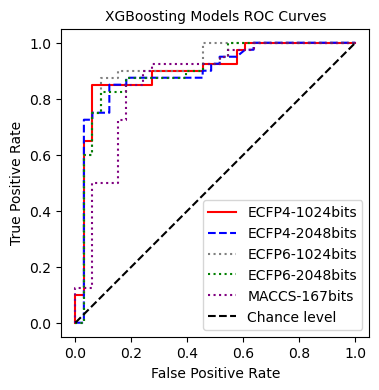

In [17]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))

fpr, tpr, _ = roc_curve(y_Test, ecfp4_1024_y_proba)
ax.plot(fpr, tpr, color='red', label="ECFP4-1024bits")

fpr, tpr, _ = roc_curve(y_Test, ecfp4_2048_y_proba)
ax.plot(fpr, tpr, color='blue', linestyle='dashed', label="ECFP4-2048bits")

fpr, tpr, _ = roc_curve(y_Test, ecfp6_1024_y_proba) 
ax.plot(fpr, tpr, color='gray', linestyle='dotted', label="ECFP6-1024bits")

fpr, tpr, _ = roc_curve(y_Test, ecfp6_2048_y_proba)
ax.plot(fpr, tpr, color='green', linestyle='dotted', label="ECFP6-2048bits")

fpr, tpr, _ = roc_curve(y_Test, maccs_y_proba)
ax.plot(fpr, tpr, color='purple', linestyle='dotted', label="MACCS-167bits")

plt.plot([0, 1], [0, 1], "k--", label="Chance level")
plt.axis("square")
plt.xlabel("False Positive Rate", fontsize=10)
plt.ylabel("True Positive Rate", fontsize=10)
plt.title("XGBoosting Models ROC Curves", fontsize=10)
plt.legend(fontsize=10)  
plt.show()

In [18]:
plt.savefig('../../results/ROC_fig/XGBoosting_ROC.png')

<Figure size 640x480 with 0 Axes>

Saving XGBoosting models

In [25]:
xgb_maccs.save_model(os.path.join('../../results/models/XGB_maccs_167bits.json'))
xgb_ecfp4_1024.save_model(os.path.join('../../results/models/XGB_ecfp4_1024bits.json'))
xgb_ecfp4_2048.save_model(os.path.join('../../results/models/XGB_ecfp4_2048bits.json'))
xgb_ecfp6_1024.save_model(os.path.join('../../results/models/XGB_ecfp6_1024bits.json'))
xgb_ecfp6_2048.save_model(os.path.join('../../results/models/XGB_ecfp6_2048bits.json'))